In [ ]:
from google.colab import files
from google.colab import drive

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yujeongyang","key":"79d486c94ed039cf803293adca468b3c"}'}

In [ ]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/*
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!kaggle competitions list

ref                                                                                deadline             category             reward  teamCount  userHasEntered  
---------------------------------------------------------------------------------  -------------------  ---------------  ----------  ---------  --------------  
https://www.kaggle.com/competitions/vesuvius-challenge-ink-detection               2023-06-14 23:59:00  Featured         $1,000,000        323           False  
https://www.kaggle.com/competitions/asl-signs                                      2023-05-01 23:59:00  Research           $100,000        856           False  
https://www.kaggle.com/competitions/tlvmc-parkinsons-freezing-gait-prediction      2023-06-08 23:59:00  Research           $100,000        364           False  
https://www.kaggle.com/competitions/amp-parkinsons-disease-progression-prediction  2023-05-18 23:59:00  Featured            $60,000        992           False  
https://www.kaggle.com/competition

In [ ]:
cd titanic_data

/content/gdrive/MyDrive/Colab Notebooks/titanic_data


In [ ]:
import pandas as pd

In [ ]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [ ]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# train 데이터 수치 및 정규화


In [ ]:
import numpy as np
data_len = data_train.shape[0]
data_train_np = np.zeros([data_len,8])

In [ ]:
data_len

891

In [ ]:
cnt = 0
sex_num = np.zeros(data_len)
for d in data_train['Sex']:
  if(d=='female'):
    sex_num[cnt] = 1
  cnt += 1

In [ ]:
sex_num = np.zeros(data_len)
for i, d in enumerate(data_train['Sex']):
  if(d=='female'):
    sex_num[i] = 1

In [ ]:
sex_num = np.zeros(data_len)
sex_num[np.array(data_train['Sex']=='female')]=1

In [ ]:
sex_num.shape

(891,)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
data_train_np[:,0:2] = to_categorical(sex_num) # one-hot-encoding 적용

In [ ]:
data_train_np[:,0:2]

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [ ]:
# to_numpy() -> numpy 배열로 변경
data_train_np[:,2:5] = to_categorical(data_train['Pclass'].to_numpy() - 1)

In [ ]:
data_train_np[:,5] = data_train['Age']/80
data_train_np[:,6] = data_train['SibSp']/10
data_train_np[:,7] = data_train['Parch']/10

In [ ]:
data_train_np

array([[1.   , 0.   , 0.   , ..., 0.275, 0.1  , 0.   ],
       [0.   , 1.   , 1.   , ..., 0.475, 0.1  , 0.   ],
       [0.   , 1.   , 0.   , ..., 0.325, 0.   , 0.   ],
       ...,
       [0.   , 1.   , 0.   , ...,   nan, 0.1  , 0.2  ],
       [1.   , 0.   , 1.   , ..., 0.325, 0.   , 0.   ],
       [1.   , 0.   , 0.   , ..., 0.4  , 0.   , 0.   ]])

In [ ]:
np.sum(np.isnan(data_train_np[:,5]))

177

In [ ]:
data_train_np[np.isnan(data_train_np[:,5]),5] = 30/80

In [ ]:
data_train_np[5,:]

array([1.   , 0.   , 0.   , 0.   , 1.   , 0.375, 0.   , 0.   ])

In [ ]:
data_train_np_y = to_categorical(data_train['Survived'])

In [ ]:
data_train_np_y

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

# test 데이터 수치 및 정규화



survived 항목은 test 데이터에 없으므로 생략


In [ ]:
# 비어있는 numpy 배열 생성
test_data_len = data_test.shape[0]
data_test_np = np.zeros([test_data_len,8])

In [ ]:
# 성별데이터를 원-핫 인코딩
sex_num = np.zeros(data_test_np.shape[0])
sex_num[np.array(data_test['Sex']=='female')] = 1
data_test_np[:,0:2] = to_categorical(sex_num)

In [ ]:
# 객실등급데이터를 원-핫 인코딩
data_test_np[:,2:5] = to_categorical(data_test['Pclass'].to_numpy()-1)

In [ ]:
# 나이, 형제/배우자수, 부모/자녀수 정규화
data_test_np[:,5] = data_test['Age']/80
data_test_np[:,6] = data_test['SibSp']/10
data_test_np[:,7] = data_test['Parch']/10

In [ ]:
# nan값의 처리
data_test_np[np.isnan(data_test_np)] = 30/80

# 연습문제 (p.255)

In [ ]:
!pwd

/content


In [ ]:
# 1.csv 파일을 다운로드 받아 google drive에 업로드
# 2. 데이터가 업로드된 구글 드라이브의 폴더와 코랩 연동하는 코드
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/*

Saving kaggle.json to kaggle.json


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!mkdir '/content/gdrive/MyDrive/Colab Notebooks/netflix-shows'

In [ ]:
cd '/content/gdrive/MyDrive/Colab Notebooks/netflix-shows'

/content/gdrive/MyDrive/Colab Notebooks/netflix-shows


In [ ]:
import pandas as pd
!kaggle datasets download -d shivamb/netflix-shows

netflix-shows.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip netflix-shows.zip

Archive:  netflix-shows.zip
  inflating: netflix_titles.csv      


In [ ]:
# 3. type 항목은 데이터가 TV show인지, Movie 인지를 나타낸다.
# 이를 수치화하는 코드를 작성하시오.
import pandas as pd
netflix_train = pd.read_csv('netflix_titles.csv')

In [ ]:
netflix_train.shape

(8807, 12)

In [ ]:
import numpy as np
netflix_len = netflix_train.shape[0]
netflix_train_np = np.zeros([netflix_len,3])
# type - TV show, Movie : 2
# release_year : 1

In [ ]:
netflix_train['type']

0         Movie
1       TV Show
2       TV Show
3       TV Show
4       TV Show
         ...   
8802      Movie
8803    TV Show
8804      Movie
8805      Movie
8806      Movie
Name: type, Length: 8807, dtype: object

In [ ]:
type_num = np.zeros(netflix_len)
type_num[np.array(netflix_train['type']=='Movie')]=1

In [ ]:
type_num

array([1., 0., 0., ..., 1., 1., 1.])

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
netflix_train_np[:,0:2] = to_categorical(type_num)

In [ ]:
netflix_train_np[:,0:2]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [ ]:
# 4. release_year 항목은 개봉된 연도를 의미하며, 숫자로 저장되어 있다.
# 이를 정규화하는 코드를 작성하시오.
netflix_train['release_year']

0       2020
1       2021
2       2021
3       2021
4       2021
        ... 
8802    2007
8803    2018
8804    2009
8805    2006
8806    2015
Name: release_year, Length: 8807, dtype: int64

In [ ]:
import numpy as np
year_orig = np.array(netflix_train['release_year'])

In [ ]:
year_orig

array([2020, 2021, 2021, ..., 2009, 2006, 2015])

In [ ]:
np.min(year_orig)

1925

In [ ]:
np.max(year_orig)

2021

In [ ]:
# 수치형 데이터의 정규화
# (원데이터 - 최솟값) / (최댓값 - 최솟값)
year_conv = (year_orig - np.min(year_orig)) / (np.max(year_orig) - np.min(year_orig))

In [ ]:
year_conv

array([0.98958333, 1.        , 1.        , ..., 0.875     , 0.84375   ,
       0.9375    ])

In [ ]:
netflix_train_np[:,2] = year_conv

In [ ]:
netflix_train_np

array([[0.        , 1.        , 0.98958333],
       [1.        , 0.        , 1.        ],
       [1.        , 0.        , 1.        ],
       ...,
       [0.        , 1.        , 0.875     ],
       [0.        , 1.        , 0.84375   ],
       [0.        , 1.        , 0.9375    ]])

In [ ]:
# 5. 개봉 연도별/TV show의 개수를 히스토그램으로 표시하시오.
import matplotlib.pyplot as plt

In [ ]:
netflix_train['type']!='Movie'

0       False
1        True
2        True
3        True
4        True
        ...  
8802    False
8803     True
8804    False
8805    False
8806    False
Name: type, Length: 8807, dtype: bool

In [ ]:
np.sum(netflix_train['type']!='Movie')

2676

In [ ]:
data_tv = netflix_train[netflix_train['type']!='Movie']

In [ ]:
data_tv

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


Text(0, 0.5, 'Number of TV show')

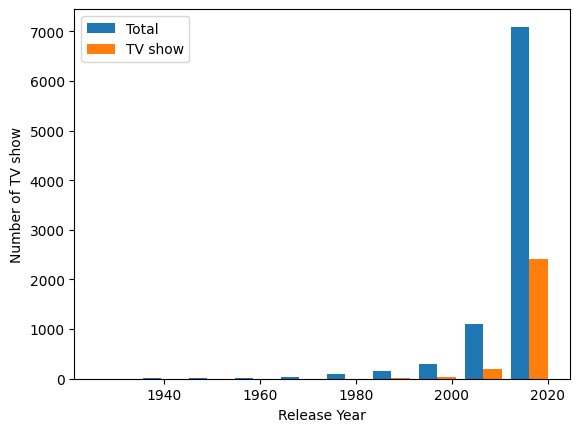

In [ ]:
plt.hist([netflix_train['release_year'], data_tv['release_year']])

plt.legend(['Total', 'TV show'])
plt.xlabel('Release Year')
plt.ylabel('Number of TV show')